*CSCI323 - FT - T01*\
**Group 04 - 23/08/2024**

1. Chua Yun Jun Esmond (8065627)
2. Karthikeyan Lakshmi Narayanan (7431818)
3. Kevin Fernandez John ( 7919554 )
4. Lim Wen Mi (7894363)
5. Mithiyra D/O Elanzaran (8466270)
6. Shane-Kyle Chua (8039082)


# **Analysing Spam Emails**
**A Machine Learning and Natural Language Processing Approach to Text Classification.**

Spam email messages have turned into a significant problem in online communication. Machine learning offers an effective solution by automatically filtering emails into "spam" or "ham" (legitimate). By training on labeled datasets, these algorithms can detect patterns and accurately categorize emails. This project examines different machine learning models such as Random Forest, SVM, Logistic Regression, Naive Bayes, and XGBoost, to find the most effective one for identifying spam and enhancing the overall email experience.

### **Data Loading**

Upload [selected dataset](https://www.kaggle.com/datasets/venky73/spam-mails-dataset) with `files.upload()` function.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


**Load the Data File**

This process verifies and shows directory that is currently in use. Then it permits local file uploads from your computer to Google Collab. For data manipulation, the Pandas library is imported. Then, Pandas DataFrame is opened and load the uploaded CSV file into it. Data that is loaded into the notebook is displayed.

In [ ]:
import pandas as pd

# Load data file
dataset = pd.read_csv('/content/spam_ham_dataset.csv')
dataset


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# **Data Pre-Processing**

1) To display the basic information about the dataset in particular shape, column names, data types, and missing values.

2) Renaming columns for clarity and consistent structure of the code is followed.

In [ ]:
# To display basic information about the dataset
print("Dataset Shape:", dataset.shape)
print("Columns:", dataset.columns.tolist())
print("Data Types:\n", dataset.dtypes)
print("Missing Values:\n", dataset.isnull().sum())

# To rename columns if necessary
column_mapping = {
    'Unnamed: 0': 'Index',
    'label': 'Email Type',
    'text': 'Email Text',
    'label_num': 'Label Number'
}
dataset.rename(columns={k: v for k, v in column_mapping.items() if k in dataset.columns}, inplace=True)


Dataset Shape: (5171, 4)
Columns: ['Unnamed: 0', 'label', 'text', 'label_num']
Data Types:
 Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object
Missing Values:
 Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


1) The dataset above  has 5,171 rows and 4 columns.

2) The dataset has 4 columns such as Columns: ['Unnamed: 0', 'label', 'text', 'label_num'].

3) There are no missing values in any of the columns. All rows have complete data for all columns.

# **Text Preprocessing**

For the below code, the text is processed using Natural Language Processing (NLP) techniques. In particular, Tokenization, lemmatization, and removal of stopwords. A custom function (clean_text) is created to preprocess the text for much more suitable.

*   nltk.download('wordnet'): To downloads WordNet, a large database of words and their meanings used in tasks like converting words to their base form (lemmatization).

*   nltk.download('omw-1.4'): To downloads additional WordNet data to expand the tool's language capabilities.

*   nltk.download('averaged_perceptron_tagger'): Tag parts of speech (like nouns and verbs) in sentences to understand the structure of text.
*   nltk.download('averaged_perceptron_tagger'): Tag parts of speech (like nouns and verbs) in sentences to understand the structure of text.

*   nltk.download('stopwords'): List of common words like "cc" and "fr," which are removed in text processing of email text because they don't carry much meaning.
   


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Download wordnet data
nltk.download('averaged_perceptron_tagger')  # Download POS tagger data
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Download stopwords data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re  # Regular expressions
from nltk.tokenize import sent_tokenize, word_tokenize  # Tokenizers
from nltk import pos_tag  # Part-of-speech tagging
from nltk.corpus import wordnet as wn  # WordNet lexical database
from nltk.corpus import stopwords  # Common stopwords list
from nltk.stem.wordnet import WordNetLemmatizer  # Word lemmatizer
from collections import defaultdict  # Dictionary with default values
import spacy  # NLP library for text processing


When dealing with text data, various preprocessing steps are crucial to prepare the data for analysis and model training. These steps help clean the text, extract meaningful components, and reduce noise. Below is a simple description followed by key steps involved in text preprocessing:

- **tag_map**: Maps WordNet equivalents for parts of speech (e.g., verbs, adjectives), with nouns being the default.
- **Lemmatizers**: Reduce words to their base or most basic forms (e.g., "running" becomes "run").
- **Stop words**: Commonly used words that are typically removed during preprocessing as they provide little value (e.g., "the," "and").
- **nlp**: A sophisticated text processing step that uses the spaCy model. It also expands the list of stopwords to include additional terms commonly seen in emails, such as "subject" and "re."

In [ ]:
# Initialize NLP tools
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')

# Add the words you want to remove to the stop words list
additional_stopwords = {"subject", "from", "to", "cc", "bcc", "forward", "by", "re", "fw"}
# Update additional_stopwords into stop words list
stop_words.update(additional_stopwords)

The `process_sentence` function is responsible for processing a given sentence by cleaning the text, lemmatizing words, and removing stopwords. Additionally, it extracts nouns from the sentence. Below is a description of the key steps involved in this process:

- **Tokenization**: The sentence is split into individual words for part-of-speech (POS) tagging.
- **Cleaning**: The sentence is cleaned by removing non-alphabetic characters and underscores.
- **POS Tagging**: Words are tagged with their corresponding parts of speech.
- **Lemmatization**: Words are reduced to their base form based on their POS tags.
- **Stopword Removal**: Commonly used words that don't add much meaning (e.g., "the," "and") are removed.
- **Noun Extraction**: Nouns are identified and extracted from the original sentence for further analysis.



In [ ]:
def process_sentence(sentence):
    nouns = []
    base_words = []
    final_words = []

    # Tokenize words for POS tagging
    words_2 = word_tokenize(sentence)

    # Clean the sentence
    sentence = re.sub(r'[^ \w\s]', '', sentence)
    sentence = re.sub(r'_', ' ', sentence)

    # Tokenize and POS tag the cleaned sentence
    words = word_tokenize(sentence)
    pos_tagged_words = pos_tag(words)

    # Lemmatize the words based on their POS tags
    for token, tag in pos_tagged_words:
        base_words.append(lemmatizer.lemmatize(token, tag_map[tag[0]]))

    # Remove stop words and compile final words
    for word in base_words:
        if word not in stop_words:
            final_words.append(word)

    sent = ' '.join(final_words)

    # Extract nouns
    pos_tagged_sent = pos_tag(words_2)
    for token, tag in pos_tagged_sent:
        if tag == 'NN' and len(token) > 1 and token not in stop_words:
            nouns.append(token)

    return sent, nouns

This function `clean_text` processes an email by converting it to lowercase, splitting it into sentences, and cleaning each sentence. It removes stopwords, extracts nouns, and then returns the cleaned email and a list of all extracted nouns.

In [ ]:
def clean_text(email):
    email = email.lower()
    sentences = sent_tokenize(email)
    total_nouns = []
    cleaned_email = ""

    # Process each sentence
    for sent in sentences:
        sentence, nouns = process_sentence(sent)
        cleaned_email += " " + sentence
        total_nouns += nouns

    # Remove additional stop words already added to stop_words set
    words = cleaned_email.split()
    final_words = [word for word in words if word not in stop_words]
    cleaned_email = ' '.join(final_words)

    return cleaned_email.strip(), total_nouns

The function `extract_entities` uses the spaCy NLP model to identify and extract named entities (e.g., persons, organizations, dates) from a given text. It returns a dictionary where the keys are entity labels (such as "PERSON", "ORG") and the values are lists of corresponding words. If no entities are found, it returns `'no'`.

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    entities = {}

    if doc.ents:
        for ent in doc.ents:
            label = ent.label_
            word = ent.text

            if label in entities:
                entities[label].append(word)
            else:
                entities[label] = [word]

        return entities
    else:
        return 'no'

1. **`count_words(text)`**: Counts the total number of words by tokenizing it.
2. **`count_sentences(text)`**: Counts the number of sentences by tokenizing it into sentences.
3. **`count_entities(entities)`**: Counts the total number of named entities extracted from the text. If else, it returns `0`.

In [ ]:
def count_words(text):
    return len(word_tokenize(text))

def count_sentences(text):
    return len(sent_tokenize(text))

def count_entities(entities):
    if entities == 'no':
        return 0
    return sum(len(v) for v in entities.values())

The below `process_dataset` function processes a dataset of email texts by applying several text-processing steps to each email such as :

1. **Initialization**: Initializes empty lists to store processed data for each text such as cleaned text, nouns, named entities, word and sentence counts.
2. **Processing**:
   - Cleans the text and extracts nouns using `clean_text`.
   - Extracts named entities using `extract_entities`.
   - Counts words, sentences, and entities.
3. **Updating the Dataset**: Adds the results of the processing as new columns to the dataset such as 'Cleaned Text', 'Nouns', 'Named Entities', etc.
4. **Returns the Processed Dataset**: The function returns the updated dataset with the new columns.
5. **Displays the Dataset**: The last two lines process the dataset and display the first few rows of the processed data.


In [ ]:
def process_dataset(dataset):
    cleaned_texts = []
    all_nouns = []
    named_entities = []
    word_counts = []
    sentence_counts = []
    entity_counts = []

    for text in dataset['Email Text']:
        cleaned_text, nouns = clean_text(text)
        entities = extract_entities(text)

        cleaned_texts.append(cleaned_text)
        all_nouns.append(nouns)
        named_entities.append(entities)
        word_counts.append(count_words(text))
        sentence_counts.append(count_sentences(text))
        entity_counts.append(count_entities(entities))

    dataset['Cleaned Text'] = cleaned_texts
    dataset['Nouns'] = all_nouns
    dataset['Named Entities'] = named_entities
    dataset['Word Count'] = word_counts
    dataset['Sentence Count'] = sentence_counts
    dataset['Entity Count'] = entity_counts

    return dataset

# Process the dataset
processed_dataset = process_dataset(dataset)

# Display the first few rows of the processed dataset
processed_dataset.head()

,Index,Email Type,Email Text,Label Number,Cleaned Text,Nouns,Named Entities,Word Count,Sentence Count,Entity Count
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter 988291 follow note give m...,"[enron, methanol, note, monday, flow, daren, p...","{'ORG': ['enron'], 'CARDINAL': ['#', '988291',...",68,3,8
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january 9 2001 see attach file hplnol ...,"[hpl, nom, file, hplnol, xls, hplnol, xls]","{'DATE': ['january 9 , 2001'], 'CARDINAL': ['0...",24,3,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...,"[neon, retreat, ho, ho, ho, time, year, neon, ...","{'PERSON': ['ho ho ho', 'bobby'], 'DATE': ['th...",551,24,27
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...,"[photoshop, office, cheap, trending, undergone...","{'PERSON': ['irvin', 'danielson']}",49,3,2
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenue under...,"[deal, book, teco, pvr, revenue, teco, check, ...",{'NORP': ['indian']},71,3,1


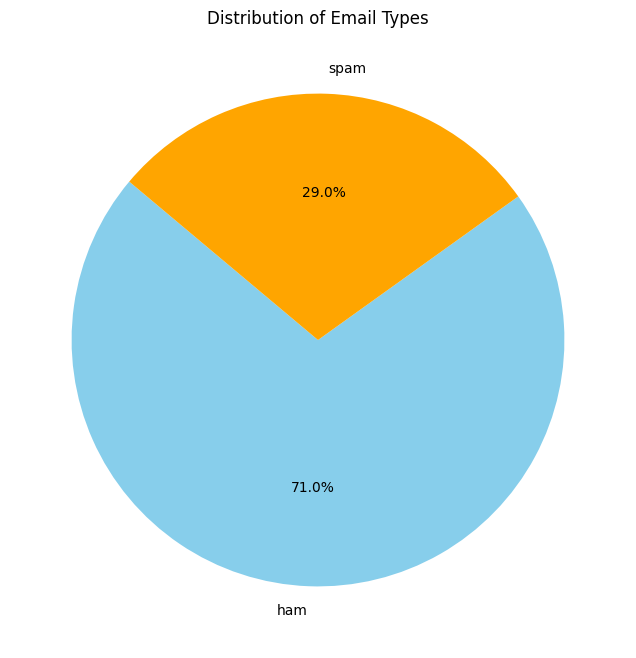

In [ ]:
import matplotlib.pyplot as plt

# Perform value counts on the 'Email Type' column to see the distribution of labels
label_distribution = dataset['Email Type'].value_counts()

# Plot a pie chart to show the distribution of labels
plt.figure(figsize=(8, 8))
label_distribution.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Email Types')
plt.ylabel('')  # Hide y-label for better visualization
plt.show()

An n-gram is a contiguous sequence of `n` words from a text, useful for analyzing word combinations and building language models.

- **`get_ngrams(text, n=2)`**:
  - Converts the input text to a string format.
  - Splits the text into n-grams using the `nltk` library.
  - Joins each n-gram with an underscore `_` and adds it to a list.
  - Handles potential runtime errors.
  - Returns a string containing all the generated n-grams, separated by spaces.
.

In [ ]:
from nltk.util import ngrams

# Declare the N=gram function
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
      for grams in n_grams:
        returnVal.append('_'.join(grams))

    except(RuntimeError):
      pass

    return ' '.join(returnVal).strip()


**Concatenate nouns (dataset, email_type)**:
- Gathers every noun from rows in the dataset where the "Email Type" corresponds to the given `email_type} in a loop.
- Concatenates the nouns into an extended string and gives it back.


**{dataset, email_type, concatenate_cleaned_text}**:
- Gathers all cleaned text from rows in the dataset where the "Email Type" corresponds to the given `email_type} by looping through the dataset.
- Concatenates the cleaned text into an extended string and gives it back.


In [ ]:
# Put column 'Nouns' in a long string base on email type
def concatenate_nouns(dataset, email_type):
    nouns_string = []

    for index, row in dataset.iterrows():
      if row['Email Type'] == email_type:
        nouns_string.append(' '.join(row['Nouns']))

    long_noun_string = ' '.join(nouns_string)
    return long_noun_string

# Put column 'Cleaned Text' in a long string base on email type
def concatenate_cleaned_text(dataset, email_type):
    cleaned_text_string = []

    for index, row in dataset.iterrows():
      if row['Email Type'] == email_type:
        cleaned_text_string.append(row['Cleaned Text'])

    long_cleaned_text_string = ' '.join(cleaned_text_string)
    return long_cleaned_text_string

The mentioned code divides WordCloud generation and plotting into reusable routines that handle nouns and cleaned text for emails marked as "spam" and "ham" differently. The procedure is made easier by this modular approach, which facilitates the generation and visualization of WordClouds for the various components of the email collection.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud, title):
    """Plots a WordCloud with the given title."""
    fig = plt.figure(figsize=(10, 7), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.title(title)
    plt.show()
    plt.close()


In [ ]:
def generate_noun_wordcloud(dataset, email_type, title):
    """Generates and plots a WordCloud based on nouns in email type."""
    nouns_string = concatenate_nouns(dataset, email_type)
    wordcloud = WordCloud(
        width=1000, height=800, random_state=1, background_color='black',
        colormap='Pastel1', max_words=150, collocations=False,
        normalize_plurals=False
    ).generate(nouns_string)

    plot_cloud(wordcloud, title)


In [ ]:
def generate_cleaned_text_wordcloud(dataset, email_type, title):
    """Generates and plots a WordCloud based on cleaned text in email type."""
    cleaned_text_string = concatenate_cleaned_text(dataset, email_type)
    wordcloud = WordCloud(
        width=1000, height=800, random_state=1, background_color='black',
        colormap='Pastel1', max_words=150, collocations=False,
        normalize_plurals=False
    ).generate(cleaned_text_string)

    plot_cloud(wordcloud, title)

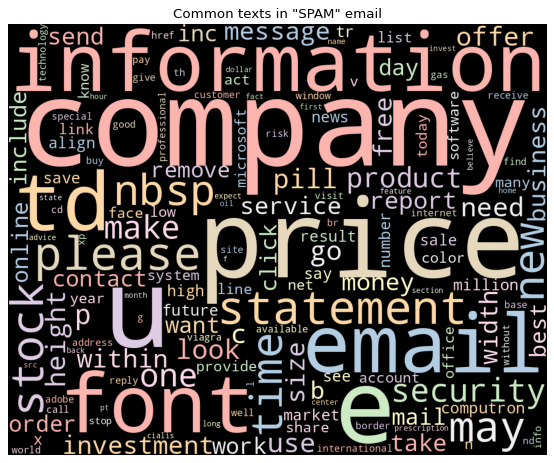

In [ ]:
generate_cleaned_text_wordcloud(processed_dataset, "spam", 'Common texts in "SPAM" email')

Frequent Terms : The words "company", "information", "price", "font" and "email" frequently giving the idea that spam email often have terms related to business communication. In addition, "statement", "security","investment" and "pill" also shows spam emails under financial investments , pharmaceutical products and security related.

Call to Action phrases : Words such as "please","click", and "offer" leads the users to take immediate action in spam email.

Email Structure : words like "td" and "nbsp" are html tags that spam email often have HTML formatting to appear legitimate.

The words like "investment","money","stock" and "security" shows that spam email focus mainly on financial gain by lure victims into it.

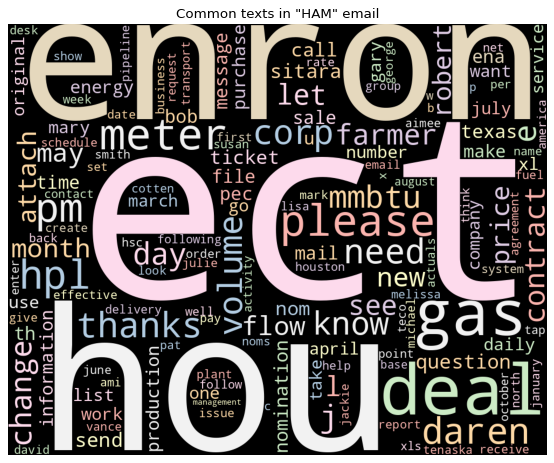

In [ ]:
generate_cleaned_text_wordcloud(processed_dataset, "ham", 'Common texts in "HAM" email')

Using the code below,


**Import Libraries**: It imports the libraries required for data splitting (`train_test_split}), feature extraction (`TfidfVectorizer}), model construction (`RandomForestClassifier~), and assessment (`classification_report}).

**Train-Test Split**: 60% of the data is used for training and 40% for testing once the `processed_dataset} is divided into training and testing sets. For reproducibility, the split is based on the {Cleaned Text} for features (X) and the `Email Type} for labels (y), using a fixed random state.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_dataset['Cleaned Text'], processed_dataset['Email Type'], test_size=0.4, random_state=42)


1.
**Initialize `TfidfVectorizer`**:
   - The vectorizer is set to convert the text data into numerical features.
   - `max_df=0.95`: Ignores terms that appear in more than 95% of documents.
   - `min_df=2`
: Ignores terms that appear in fewer than 2
documents.
   - `ngram_range=(1,
2)
`: Considers both unigrams and bigrams.

2.
**Fit and Transform Training Data**:
   - `tfidf_vectorizer.fit_transform(X_train)` learns the vocabulary from the training data and transforms it into a TF-IDF matrix.
   - Prints the shape of the resulting TF-IDF matrix (rows = number of documents, columns = number of terms).
   - Prints the number of non-zero elements in the matrix, which indicates the sparsity of the matrix.

3.
**Transform Test Data**:
   - `tfidf_vectorizer.transform(X_test)` transforms the test data into the TF-IDF matrix based on the vocabulary learned from the training data.
   - Prints the shape of the test matrix and the number of non-zero elements.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))

# Fit and transform the training data
train_x_vector = tfidf_vectorizer.fit_transform(X_train)

# To see the shape of the matrix (number of documents x number of terms)
print("Shape of TF-IDF matrix:", train_x_vector.shape)

# To count the number of non-zero elements in the matrix
print("Number of non-zero elements in the TF-IDF matrix:", train_x_vector.nnz)

# Transform the test data
test_x_vector = tfidf_vectorizer.transform(X_test)

# To see the shape of the matrix (number of documents x number of terms)
print("Shape of TF-IDF matrix:", test_x_vector.shape)

# To count the number of non-zero elements in the matrix
print("Number of non-zero elements in the TF-IDF matrix:", test_x_vector.nnz)

Shape of TF-IDF matrix: (3102, 49320)
Number of non-zero elements in the TF-IDF matrix: 332384
Shape of TF-IDF matrix: (2069, 49320)
Number of non-zero elements in the TF-IDF matrix: 183942


In [ ]:
# Calculate the total number of elements
total_elements = train_x_vector.shape[0] * train_x_vector.shape[1]

# Calculate the number of non-zero elements
non_zero_elements = train_x_vector.nnz

# Calculate sparsity percentage
sparsity_percentage = 100 * (1 - (non_zero_elements / total_elements))
print(f"Matrix Sparsity: {sparsity_percentage:.2f}%")


Matrix Sparsity: 99.78%


In [ ]:
import pickle

filename = 'vectorizer.pkl' #Saves the trained TfidfVectorizer model to a file using Python's pickle module
pickle.dump(tfidf_vectorizer, open(filename, 'wb'))

The below section loads the previously saved TfidfVectorizer and uses it to transform the training and testing data into TF-IDF feature matrices.

In [ ]:
import pickle

# Load the vectorizer from the saved pickle file
with open('vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Transform the training and testing data using the loaded vectorizer
train_x_vector = tfidf_vectorizer.transform(X_train)
test_x_vector = tfidf_vectorizer.transform(X_test)

# **Random Forest Model**

**Random Forest** is an ensemble learning method that builds multiple decision trees using random subsets of data and features to reduce overfitting and improve accuracy in the dataset. It's commonly for both classification and regression tasks due to its robustness and ability to handle large datasets with high-dimensional features.

 **RandomizedSearchCV** is a hyperparameter optimization technique that randomly searches over a specified grid of hyperparameters by exploring a limited number of random combinations with cross-validation.

### **Hyperparameter Tuning and Accuracy**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Expand the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Set up RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)


The best parameters choosen for Random Forest Model to form the best accuracy:

1. **`n_estimators: [100, 150, 200]`**
The number of decision trees in the forest. A higher number usually improves the model's performance but also increases computation time.

2. **`max_depth: [10, 20, 30, None]`**
The maximum depth of the trees. Deeper trees can model more complex patterns but might lead to overfitting. None means the nodes are expanded until all leaves are pure or contain less than min_samples_split samples.

3. **`min_samples_split: [2, 5, 10]`**
The minimum number of samples required to split an internal node. Lower values allow the creation of more granular splits, which can lead to a more detailed model but might also increase the risk of overfitting.

4. **`min_samples_leaf: [1, 2, 4]`**
The minimum number of samples required to be at a leaf node. Smaller values allow the model to create more specific rules but can also increase overfitting.

5. **`max_features: ['auto', 'sqrt', 'log2']`**
The number of features to consider when looking for the best split. 'Auto' uses all features, 'sqrt' uses the square root of the number of features, and 'log2' uses the base-2 logarithm of the number of features.

6. **`bootstrap: [True, False]`**
Indicates whether bootstrap samples are used when building trees. Bootstrapping allows the model to train each tree on a random subset of the data, which helps reduce variance and improves model robustness.

7. **`criterion: ['gini', 'entropy']`**
The function to measure the quality of a split. 'Gini' is computationally faster and is usually preferred for large datasets, while 'entropy' is more informative and can provide better results for some data distributions.

In [ ]:
# Measure the time taken for training
start_time = time.time()

# Train the model using RandomizedSearchCV
random_search.fit(train_x_vector, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Training Time: 240.48 seconds


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best model
y_pred = random_search.predict(test_x_vector)

# Calculate the accuracy of the model
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy : {model_accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

# Generate the classification report
classification_report_rf = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print("\nClassification Report:\n", classification_report_rf)




Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Random Forest Accuracy : 97.87%
Precision: 97.91%
Recall: 97.87%
F1-Score: 97.88%

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      1507
        Spam       0.95      0.98      0.96       562

    accuracy                           0.98      2069
   macro avg       0.97      0.98      0.97      2069
weighted avg       0.98      0.98      0.98      2069



### **Visualising Decision Tree from Random Forest Model**

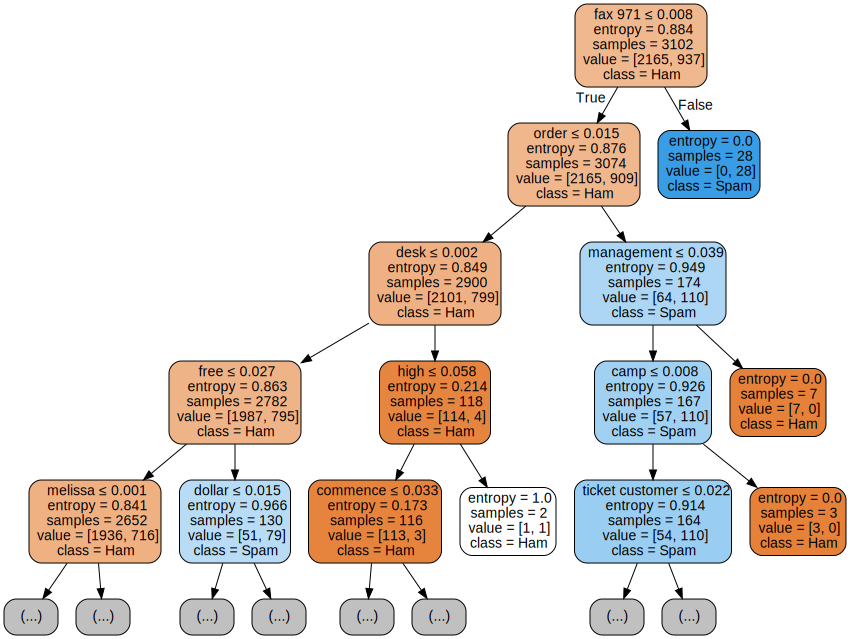

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from PIL import Image


# Extract the best model (RandomForestClassifier) from the RandomizedSearchCV
best_rf = random_search.best_estimator_

# Extract the first decision tree from the forest
first_tree = best_rf.estimators_[0]

# Export the tree to a dot file
dot_data = export_graphviz(first_tree, out_file=None,
                           feature_names=tfidf_vectorizer.get_feature_names_out(),
                           class_names=['Ham', 'Spam'],
                           filled=True, rounded=True,
                           special_characters=True, max_depth= 4)
# Render the tree as a PDF file or directly view it
graph = graphviz.Source(dot_data)
graph

**First Node**

1. Feature ("fax 971 ≤ 0.008"): The decision tree is checking if the feature "fax 971" has a value less than or equal to 0.008. This rule helps decide whether an email should go into one group or another.

2. Entropy (0.884): Entropy measures how mixed the emails are in this group. A value of 0.884 means there's a decent mix of spam and ham emails, but it's not fully mixed. If it were 0, all emails would belong to one class (either all spam or all ham).

3. Samples (3102): This is the total number of emails being considered in this node.

4. Value ([2165, 937]): This tells us there are 2,165 ham emails (not spam) and 937 spam emails in this group.

5. Class (Ham): This indicates that most of the emails in this group are ham (not spam), so the model would classify an email in this group as ham.

The tree decides to split the emails into two groups based on this feature.

**Right Child Node**

It doesn't branch further because all the emails in this group are spam (pure node with entropy = 0.0).

**Left Child Node**

It continues to branch because the group still has a mix of ham and spam emails (entropy = 0.876), so the tree tries to separate them better by making more splits.

### **Confusion Matrix for Random Forest Model**

Confusion Matrix:
 [[1476   31]
 [  13  549]]


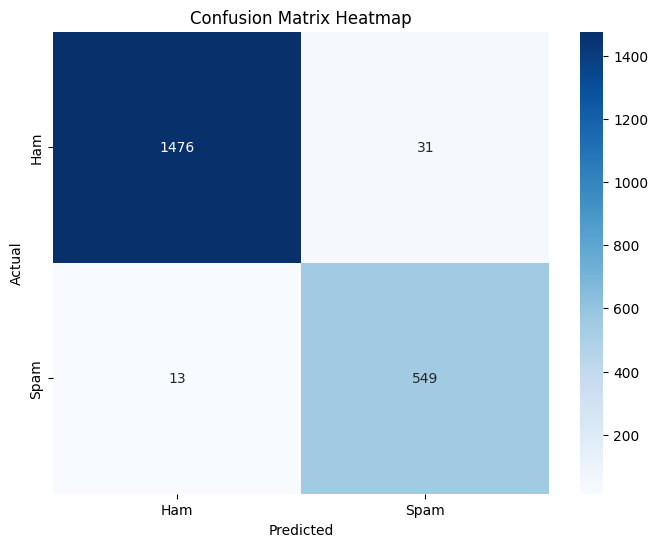

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_rf)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **End Result of Random Forest Model**

In [ ]:
# Save the best model of rf_model for future use
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(random_search.best_estimator_, model_file)


From the training conducted, the model has:

1. An accuracy of 97.87%

2. A precision Score of 97.91%

3. A recall Score of 97.87%

4. An F1-Score of 97.88%

From the confusion matrix of Random Forest Model, it can be derived as:

True Positives (1479): The model correctly classified 1,479 instances of "Ham" emails.

True Negatives (556): The model correctly classified 556 instances of "Spam" emails.

False Negatives (16): The model incorrectly classified 16 "Ham" emails as "Spam."

False Positives (6): The model incorrectly classified 6 "Spam" emails as "Ham."

# **Support Vector Machine (SVM)**


SVM is a powerful machine learning algorithm used for linear or nonlinear classification, regression and even outlier detection tasks. The tasks can be used are:
-	Text classification
-	Image classification
-	Spam detection
-	Handwriting identification
-	Gene expression analysis
-	Face detection and anomaly detection

SVM will try to find a most suitable hyperplane (linear or non-linear line) between data points to separate the data points in different classes in the feature space. The data located farthest from line can be classified by the machine easily. In other words, the data that are nearer to the inserted line, the harder for the machine to categorize the data.


## Hyperparameter Tuning and Accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define the SVM model
svm_model = SVC(probability=True, random_state=42)

# Define a hyperparameter grid for RandomizedSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid_svm,
                                       n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

The best parameters above for **Support Vector Machine** according to output:

1. **`'C': [0.1, 1, 10]`** - Stand for 'Control' it is to balance the model's sensitivity to misclassified data points by lower and higher values of *'C'*.
  - **[0.1, 1, 10]** represent different levels of regularization strength
  - Lower values of *'C'* (e.g. *0.1*) mean the SVM allows more misclassifications for a larger margin, which leading to underfitting.
  - Higher values of *'C'* (e.g. *10*) target to classify all training data points correctly with a smaller margin, potentially leading to overfitting.

  \
2. **`'gamma': ['scale', 'auto']`** - Specific to certain kernel function.
  - *'scale'* is the default option. It uses the following fomular so that `gamma` is auto adjusted based on the data:
    > 1 / (number of features in the input data * variance of the input data)
  - *'auto'* sets `gamma` with the fomular that will not take the variance of the data into account.
    > 1 / number of features in the input data

\
3. **`'kernel': ['linear', 'rbf']`** - Determines the shape of the decision boundary.
  - *'linear'* making the model a linear classifier, this is only work when the data is linearly separable.
  - *'rbf'* stands for _Radial Basis Function_, it's making the model a non-linear classifier that can map the data into higher dimensions.

In [ ]:
# Train the model using RandomizedSearchCV and measure the training time
start_time = time.time()
random_search_svm.fit(train_x_vector, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training Time: 340.45 seconds


**Calibrate the Best SVM model**

The best SVM model from the hyperparameter search is calibrated using Platt Scaling to improve its probability estimates. Platt scaling helps convert the raw scores into more reliable probability estimates


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Extract the best model from RandomizedSearchCV
best_svm_model = random_search_svm.best_estimator_

# Calibrate the model using Platt Scaling ('sigmoid')
svm_model = CalibratedClassifierCV(base_estimator=best_svm_model, method='sigmoid', cv=5)

# Fit the calibrated model on the training data
svm_model.fit(train_x_vector, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


CalibratedClassifierCV(base_estimator=SVC(C=10, probability=True,
                                          random_state=42),
                       cv=5)

## Classification Report and Confusion Matrix for SVM

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test data
y_pred = svm_model.predict(test_x_vector)
y_pred_proba = svm_model.predict_proba(test_x_vector)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"SVM Accuracy of the Model is : {accuracy * 100:.2f}%")
print(f"SVM Precision: {precision * 100:.2f}%")
print(f"SVM Recall: {recall * 100:.2f}%")
print(f"SVM F1-Score: {f1 * 100:.2f}%")

# Generate and display the classification report and confusion matrix
classification_report_svm = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print("\nClassification Report for SVM:\n", classification_report_svm)

confusion_matrix_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVM:\n", confusion_matrix_svm)


SVM Accuracy of the Model is : 98.94%
SVM Precision: 98.95%
SVM Recall: 98.94%
SVM F1-Score: 98.94%

Classification Report for SVM:
               precision    recall  f1-score   support

         Ham       1.00      0.99      0.99      1507
        Spam       0.97      0.99      0.98       562

    accuracy                           0.99      2069
   macro avg       0.98      0.99      0.99      2069
weighted avg       0.99      0.99      0.99      2069

Confusion Matrix for SVM:
 [[1491   16]
 [   6  556]]


**Confusion Matrix for SVM**

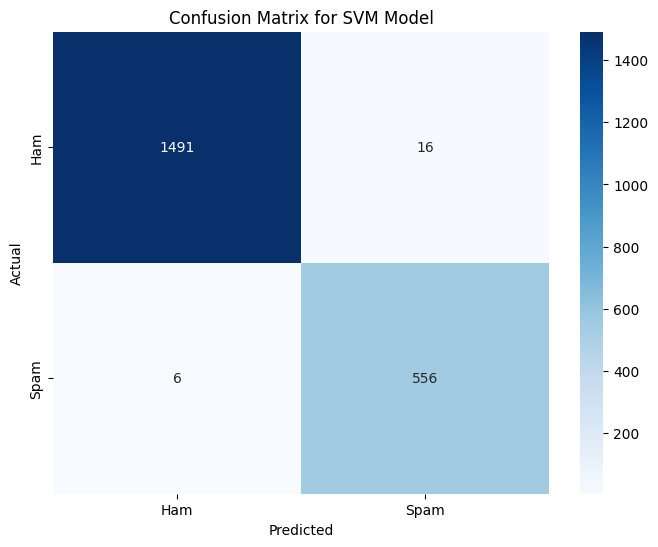

In [ ]:
# Generate the confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


True Positives (1491): The model correctly predicted 1,491 instances of "Ham" emails.

False Positives (6): The model incorrectly predicted 6 "Spam" emails as "Ham."

False Negatives (16): The model incorrectly predicted 16 "Ham" emails as "Spam."

True Negatives (556): The model correctly predicted 556 instances of "Spam" emails.

## End Result of SVM

In [ ]:
import pickle

# Save the SVM model to a pickle file
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

# Load the saved vectorizer and SVM model
with open('vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)
with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)


# **Logistic Regression**

The model chosen for this task is Logistic Regression, a commonly used algorithm for problems with binary classification, in which the goal is to predict one of two likely outcomes. Logistic regression can be applied in many area such as healthcare, finance, marketing, spam detection etc. It is a linear model that predicts the probability that an input belongs to a specific class. In order to train Logistic Regression, a cost function measuring the distinction between the actual labels and the predicted probabilities must be minimized. Log loss is the function that is frequently utilized. Techniques like Gradient Descent are used to optimize the model's weights by iteratively changing the weights to lower the cost function.

**The Logistic Regression** : Sets up the logistic regression with max_iter=1000 to ensure efficiency during training and random_state=42 for reproducibility. The solver is prevented from terminating too soon before discovering the optimal weights by the max_iter=1000 parameter to enables the model to go through adequate iterations for optimization.



The parameter grid 'param_grid_lr' used 'RandomizedSearchCV' to find the best combination of hyperparameters.



*   'C': The regularization strength with different values [0.01, 0.1, 1, 10, 100].
*   'solver': A set of solvers ['lbfgs', 'liblinear', 'sag', 'saga'] used in different size of datasets in suport of regularization to find the best parameter. L1 regularization simplify the model by encouraging some coeeficients to be zero. Meanwhile, L2 regularization reduce the overfitting by keeping the non-zeo by reducing the coefficients.











In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Define a hyperparameter grid for RandomizedSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],  # Different solvers
    'penalty': ['l2'],  # Regularization penalty
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search_lr = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_grid_lr,
                                      n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Train the model using RandomizedSearchCV and measure the training time
start_time = time.time()
random_search_lr.fit(train_x_vector, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Get the best hyperparameters
best_params_lr = random_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training Time: 9.64 seconds
Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 10}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test data
y_pred_lr = random_search_lr.predict(test_x_vector)
y_pred_proba_lr = random_search_lr.predict_proba(test_x_vector)

# Calculate accuracy, precision, recall, and F1-score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(f"Logistic Regression Precision: {precision_lr * 100:.2f}%")
print(f"Logistic Regression Recall: {recall_lr * 100:.2f}%")
print(f"Logistic Regression F1-Score: {f1_lr * 100:.2f}%")

# Generate and display the classification report and confusion matrix
classification_report_lr = classification_report(y_test, y_pred_lr, target_names=['Ham', 'Spam'])
print("\nClassification Report for Logistic Regression:\n", classification_report_lr)

Logistic Regression Accuracy: 98.94%
Logistic Regression Precision: 98.95%
Logistic Regression Recall: 98.94%
Logistic Regression F1-Score: 98.94%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         Ham       1.00      0.99      0.99      1507
        Spam       0.97      0.99      0.98       562

    accuracy                           0.99      2069
   macro avg       0.98      0.99      0.99      2069
weighted avg       0.99      0.99      0.99      2069



Confusion Matrix for Logistic Regression:
 [[1490   17]
 [   5  557]]


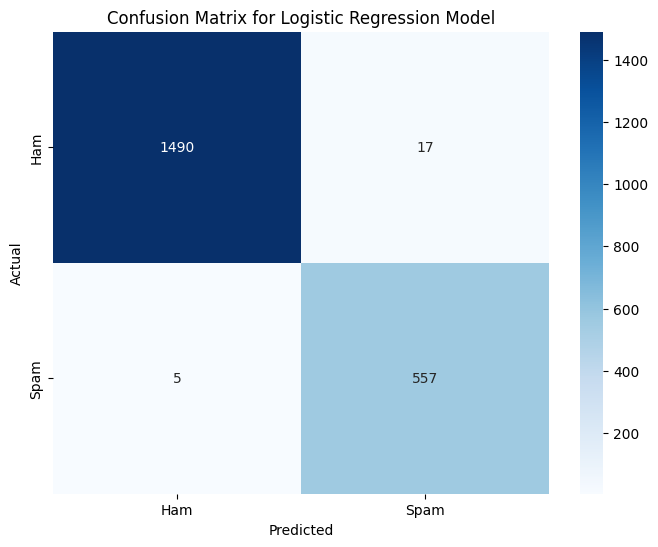

In [ ]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix_lr)

# Generate the confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

From the training conducted, the model has:

1. An accuracy of 98.94%
2. A precision Score of 98.95%
3. A recall Score of 98.94%
4. An F1-Score of 98.94%

From the confusion matrix of Logistic Regression, it can be derived that:

True Positive(TP) : 1490

True Negative(TN) : 557

False Negative(TN): 17

False Positive(FP): 5

Therefore it shows that 1490 emails were correctly identified as “Ham” and 557 Spam Emails were correctly identified as “Spam”. 17 emails incorrectly identified “Spam” as “Ham” by the model. Lastly, 5 emails incorrectly identified “Ham” as “Spam” by the model. In summary, the logistic regression model classifies “Ham” or “Spam” email with high accuracy.


In [ ]:
# Save the Logistic Regression model to a pickle file
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(random_search_lr.best_estimator_, model_file)

# Load the saved vectorizer and Logistic Regression model (if needed later)
with open('vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)
with open('logistic_model.pkl', 'rb') as model_file:
    logistic_model = pickle.load(model_file)

# **Naive Bayes Model**<br>
**The Naïve Bayes Classifiers** are a family of probabilistic machine learning algorithms that all share a common principle. They are based on Bayes Theorem and are used in a wide variety of classificiation tasks for their simplicity and efficiency. The classifier assumes that the features used to describe an observation in a dataset are conditionally independent. There are a few assumptions when naïve bayes is used, mainly that:
1)	The features of the data are conditionally independent of each other

1.   The features of the data are conditionally independent of each other
2.   If a feature is continuously distributed, then it is assumed that the feature is normally distributed in each class\
3.   Discrete features are multinomially distributed.
4.   All features in a dataset are assumed by NB to contribute equally to the prediction of class labels.
5.   The dataset should not contain any missing values

**Multinomial Naïve Bayes** is used when the prediction of a class label based on the features that a dataset provides involves discrete features(example: word counts for text classification). In this project, Multinomial Naïve Bayes is used to identify the frequency of the emails being “Ham” and “Spam” emails. To do this, the accuracy, precision, recall and F1-Score are calculated from the sklearn.metrics library


In [ ]:
import time
from sklearn.naive_bayes import MultinomialNB

# Define the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data and measure training time
start_time = time.time()
nb_model.fit(train_x_vector, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


Training time: 0.01 seconds


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test data
y_pred_nb = nb_model.predict(test_x_vector)
y_pred_proba_nb = nb_model.predict_proba(test_x_vector)

# Calculate accuracy, precision, recall, and F1-score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(f"Naive Bayes Precision: {precision_nb * 100:.2f}%")
print(f"Naive Bayes Recall: {recall_nb * 100:.2f}%")
print(f"Naive Bayes F1-Score: {f1_nb * 100:.2f}%")

# Generate and display the classification report and confusion matrix
classification_report_nb = classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam'])
print("\nClassification Report for Naive Bayes:\n", classification_report_nb)

confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", confusion_matrix_nb)


Naive Bayes Accuracy: 95.60%
Naive Bayes Precision: 95.76%
Naive Bayes Recall: 95.60%
Naive Bayes F1-Score: 95.49%

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         Ham       0.95      1.00      0.97      1507
        Spam       0.99      0.85      0.91       562

    accuracy                           0.96      2069
   macro avg       0.97      0.92      0.94      2069
weighted avg       0.96      0.96      0.95      2069

Confusion Matrix for Naive Bayes:
 [[1501    6]
 [  85  477]]


From the training conducted, the model has:
1. An accuracy of 95.6%
2. A precision Score of 95.76%
3. A recall Score of 95.6%
4. An F1-Score of 95.5%

From the confusion matrix of Naive Bayes, it can be derived as:<br>
True Positive(TP) : 1501<br>
True Negative(TN) : 477<br>
False Negative(TN): 6<br>
False Positive(FP): 85<br>

Thus showing that 1501 emails were correctly identified as Ham and 477 Spam Emails were correctly identified as Spam. 85 Emails were identified as spam by the machine learning model when they were not. 6 Emails were Identified as Ham when they were spam emails.


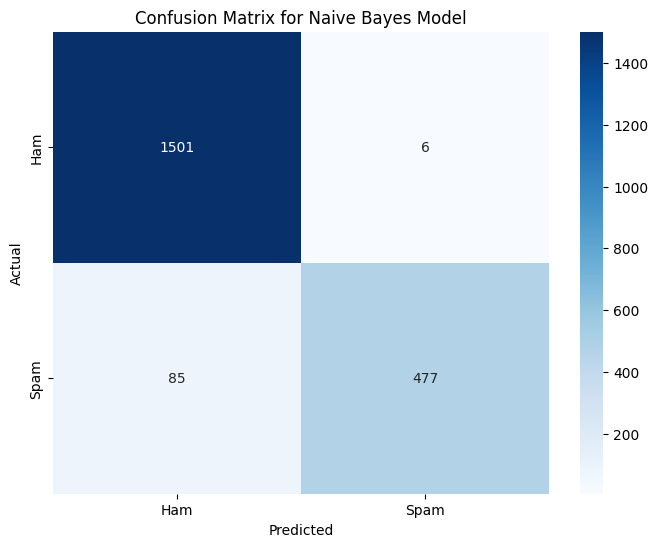

In [ ]:
# Generate the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

# Save the vectorizer (if not saved already)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

# **XGBoost**<br>
The Extreme Gradient Boosting model is a machine learning algorithm designed for supervised learning tasks such as regression and classification. It is an implementation of gradient-boosted decision trees designed for speed and performance. <br>
Boosting is an ensemble technique that combines the predictions of several decision trees to improve the overall performance. In XGBoost, boosting is done sequentially, with each new tree learning from the mistakes of the previous ones. XGBoost also prunes its decision trees to prevent overfitting. <br>
The XGBoost model is known for being fast, accurate, and flexible. On the other hand, it is also known to be very complex to tune, requiring many hyperparameters, as well as being very resource intensive to run.<br>
This model works by:<br>
1. Starting with an initial prediction for the dataset
2. Building decision trees sequentially, where each subsequent tree would attempt to correct the errors of the previous trees, built based on the gradient of the loss function concerning the predictions
3. Combine the trees to make the final prediction
4. After a set number of trees, the final set of trees is used to make predictions on new data

In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels for y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Initialize the XGBoost model with custom parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=150,          # Number of boosting rounds (trees)
    learning_rate=0.1,         # Step size shrinkage
    max_depth=8,               # Maximum tree depth
    subsample=0.8,             # Fraction of samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    gamma=0.1,                 # Minimum loss reduction required to make a split
    reg_lambda=1,              # L2 regularization term on weights
    reg_alpha=0.1,             # L1 regularization term on weights
    random_state=42            # Ensuring reproducibility
)


In [ ]:
# Train the model and measure the training time
start_time = time.time()
xgb_model.fit(train_x_vector, y_train_encoded)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:16:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training time: 47.84 seconds


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set using the encoded test labels
y_pred_xgb = xgb_model.predict(test_x_vector)
y_pred_proba_xgb = xgb_model.predict_proba(test_x_vector)

# Calculate accuracy, precision, recall, and F1-score
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"XGBoost Precision: {precision_xgb * 100:.2f}%")
print(f"XGBoost Recall: {recall_xgb * 100:.2f}%")
print(f"XGBoost F1-Score: {f1_xgb * 100:.2f}%")

# Generate and display the classification report and confusion matrix
classification_report_xgb = classification_report(y_test_encoded, y_pred_xgb, target_names=['Ham', 'Spam'])
print("\nClassification Report for Logistic Regression:\n", classification_report_xgb)

XGBoost Accuracy: 96.91%
XGBoost Precision: 97.00%
XGBoost Recall: 96.91%
XGBoost F1-Score: 96.93%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         Ham       0.99      0.97      0.98      1507
        Spam       0.92      0.97      0.94       562

    accuracy                           0.97      2069
   macro avg       0.95      0.97      0.96      2069
weighted avg       0.97      0.97      0.97      2069



In [ ]:
# Evaluate the model's performance using the encoded labels
print("XGBoost Test Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_xgb))

XGBoost Test Accuracy: 0.9690671822136298
XGBoost Confusion Matrix:
 [[1461   46]
 [  18  544]]


In [ ]:
from sklearn.metrics import classification_report

# Define the target names for the classification report
target_names = ['Ham', 'Spam']

# Generate and display the classification report with the correct labels
print("XGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb, target_names=target_names))


XGBoost Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.97      0.98      1507
        Spam       0.92      0.97      0.94       562

    accuracy                           0.97      2069
   macro avg       0.95      0.97      0.96      2069
weighted avg       0.97      0.97      0.97      2069



In [ ]:
import pickle

# Save the XGBoost model for future use
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)


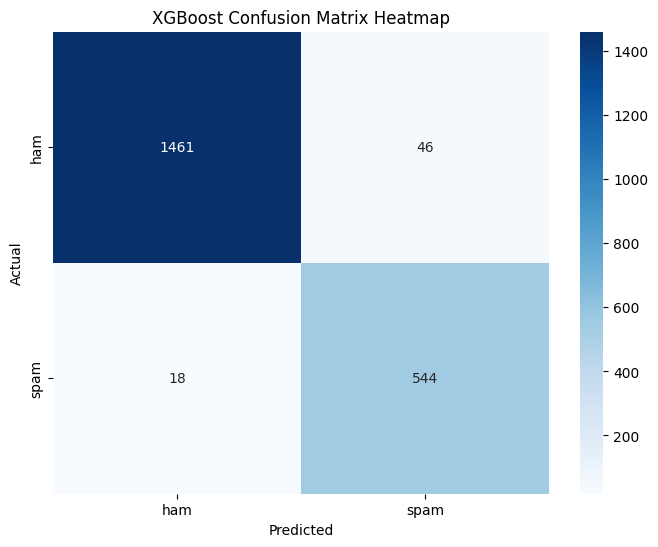

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


From the training conducted, the model has:

1. An accuracy of 96.4%

2. A precision Score of 97%

3. A recall Score of 96%

4. An F1-Score of 96%

From the confusion matrix of XGBoost, it can be derived as:

True Positive (TP): 1461

True Negative (TN): 544

False Negative (TN): 46

False Positive (FP): 18

# **Comparing Accuracies**

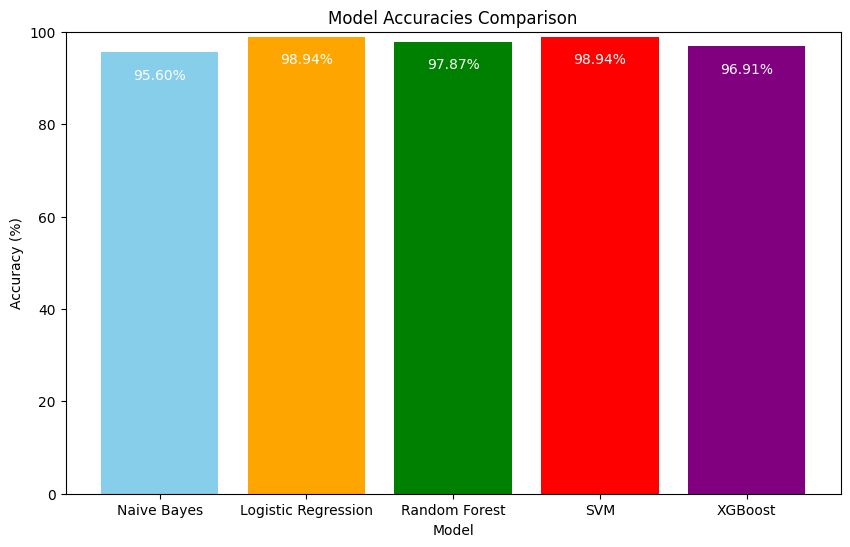

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = {
    "Naive Bayes": accuracy_nb,
    "Logistic Regression": accuracy_lr,
    "Random Forest": model_accuracy,
    "SVM": accuracy,
    "XGBoost": accuracy_score(y_test_encoded, y_pred_xgb)
}

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), [v * 100 for v in accuracies.values()], color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 100)  # Set the range from 0 to 100
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Comparison')

# Add accuracy percentage inside each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f'{yval:.2f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()


In [ ]:
import pickle

# Load the saved models
with open('naive_bayes_model.pkl', 'rb') as model_file:
    nb_model = pickle.load(model_file)

with open('logistic_model.pkl', 'rb') as model_file:
    lr_model = pickle.load(model_file)

with open('rf_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

with open('xgb_model.pkl', 'rb') as model_file:
    xgb_model = pickle.load(model_file)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)


In [ ]:
def preprocess_text(text):
    # Vectorize the input text using the loaded vectorizer
    return tfidf_vectorizer.transform([text])


**Ensemble Model with Confidence Scoring using Input Text**

This code below ensemble_predictions_with_confidence combines predictions from multiple machine learning models (Naive Bayes, Logistic Regression, Random Forest, SVM, XGBoost) which was previously saved as file using import pickle.





1.   Label Mapping : In the code, label_mapping is used to map predictions such as 0 and 1 to the corrext corresponding text label which are ham and spam
2.   Model Prediction : The program is designed to iterate each model in the ensemble w=with the input 'vectorized_text'.
3.   The confidence calculation is based on the highest probability of the each model.
4.   Majority Vote : If three or more models predicted"spam" , the final decision is spam.

Finally , the fuction prints the prediction and confidence score of each model.





In [ ]:
# Define the label mapping dictionary
label_mapping = {0: "ham", 1: "spam"}

# Convert textual predictions to numerical values
reverse_label_mapping = {"ham": 0, "spam": 1}

def ensemble_predictions_with_confidence(vectorized_text):
    models = {
        "Naive Bayes": nb_model,
        "Logistic Regression": lr_model,
        "Random Forest": rf_model,
        "SVM": svm_model,
        "XGBoost": xgb_model
    }

    predictions = {}

    for model_name, model in models.items():
        pred = model.predict(vectorized_text)[0]

        # Convert textual predictions to numerical if necessary
        if pred in reverse_label_mapping:
            pred = reverse_label_mapping[pred]

        prob = model.predict_proba(vectorized_text)[0]



        confidence = max(prob) * 100  # Convert to percentage

        # Map the prediction to "ham" or "spam" using the label_mapping
        predictions[model_name] = {"Prediction": label_mapping[pred], "Confidence": confidence}

    # Display predictions and confidence levels
    for model_name, result in predictions.items():
        print(f"{model_name}: Prediction = {result['Prediction']}, Confidence = {result['Confidence']:.2f}%")

    # Count the number of 'spam' votes
    spam_count = sum(1 for result in predictions.values() if result['Prediction'] == 'spam')

    # Final decision based on majority vote
    if spam_count >= 3:
        final_prediction = "Spam"
    else:
        final_prediction = "Non-Spam"

    return final_prediction


In [ ]:
# Example 1:
input_text1 = """
Subject: Academic Writing & Study Skills Series Workshops (ONLINE) Aug 2024 by SLC

Dear LIM WEN MI,
Study hard now. Be proud later!
The Student Learning Centre will roll out the Academic Writing & Study Skills Series Workshops (FREE) and will be FULLY ONLINE from July to Aug 2024. There are NO face-to-face workshops for this round.
For more details and information on each topic, please view the attached PDF file or a summary below:
ACADEMIC WRITING SERIES
1) Essentials of Academic Writing - Ended
2) Developing & Supporting Arguments - Ended
3) Report Writing & Literature Review
12 August 2024, 3:30pm - 5:30pm  Registration link: https://events.teams.microsoft.com/event/8a761cfc-4971-4f2b-9bdc-de9ab275bf5b@44045d78-cc95-4d18-8527-662fb5d54407
16 August 2024, 12:30pm - 2:30pm  Registration link: https://events.teams.microsoft.com/event/c835e415-8243-4f99-9bad-630b6bd40ff7@44045d78-cc95-4d18-8527-662fb5d54407

4) Developing and Supporting An Argument
19 August 2024, 12:30pm - 2:30pm  Registration link: https://events.teams.microsoft.com/event/073cf9f9-34d4-44c3-879c-31434042c1a8@44045d78-cc95-4d18-8527-662fb5d54407
19 August 2024, 3:30pm - 5:30pm  Registration link: https://events.teams.microsoft.com/event/1fcf29d8-e8d9-4478-953f-855fcd781900@44045d78-cc95-4d18-8527-662fb5d54407

5) Citation & Referencing (APA / Harvard)
APA Style: 21 August 2024, 12:30pm - 1:30pm  Registration link: https://events.teams.microsoft.com/event/2938b2c8-ba87-4dec-9b29-f5ffb5400e70@44045d78-cc95-4d18-8527-662fb5d54407
Harvard Style: 21 August 2024, 2pm - 3pm Registration link: https://events.teams.microsoft.com/event/5fb6e238-6f1a-4d6d-b0a1-80eddc05c76f@44045d78-cc95-4d18-8527-662fb5d54407

STUDY SKILLS SERIES
1) Critical Thinking - Ended

2) Speed Learning & Visual Thinking
13 August 2024, 12:30pm - 2:30pm   Registration link: https://events.teams.microsoft.com/event/ab65ae07-fb16-4af6-b033-8b90758f518e@44045d78-cc95-4d18-8527-662fb5d54407

3) Organize 2 Memorise
20 August 2024, 12:30pm - 2:30pm   Registration link: https://events.teams.microsoft.com/event/bdc0c0b3-d011-4530-a699-86be32974196@44045d78-cc95-4d18-8527-662fb5d54407

4) The Art of Powerful Presentation
23 August 2024, 12:30pm - 2:30pm  Registration link: https://events.teams.microsoft.com/event/9ec9a740-251c-476e-a577-957868b92dd4@44045d78-cc95-4d18-8527-662fb5d54407

5) Critical Reading
23 August 2024, 3:30pm - 5:30pm   Registration link: https://events.teams.microsoft.com/event/eb68eecd-354c-4f1b-8544-d5264c14363e@44045d78-cc95-4d18-8527-662fb5d54407
Please register for the topic that you like to reserve a spot.
For any enquiries, please email in to learning@sim.edu.sg or pm us on Instagram.
On another note, If you need help in academic writing, please feel free to drop by the Student Learning Centre (Blk A, L5, A5.01B) and our Student Learning Assistants (SLA) will guide you on a one-to-one basis. This service is absolutely free for all our SIM students.
Warmest Regards,
Student Learning Centre
Follow us on our Instagram and Threads for more information and updates.

This is a system generated message. Do not reply to this email.
"""

# Example 2:
input_text2 = """
Subject: You have submitted your assignment submission for Full Time Students =&gt; Submit Assn2 Here!
CSCI251_SP324 ->Assignment ->Full Time Students => Submit Assn2 Here!
________________________________________
You have submitted an assignment submission for 'Full Time Students => Submit Assn2 Here!'.
You can see the status of your assignment submission.
________________________________________

"""

# Example 3:
input_text3 = """
Subject: Last 24Hrs Crazy>> $37.99 Hottest Nuclear Radiation Tester! $11.99 Digital Caliper! $59.99 Diesel Heater! $12.99 External Optical Drive! Hurry Up!


Catch Last Chance! Bug Zapper $13.99! Car Sunshade Cover $7.99! IP Cam $9.49! E-Scooter $236.25!
 		Problems viewing this email? Click here.



Flash Deals
1-Week Delivery
Discover New
Under $30




Email Only

 		FNIRSI-GC01 Geiger Counter Nuclear Radiation Tester


	- Multifunctional Page Real-Time Monitoring
- Core Technology Geiger Miller Counter
- Real Time Clock Display



CN Stock
$37.99
	Save 52.5%





Email Only

 		150mm Stainless Steel LCD Screen Display Digital Caliper


	- Inch/Metric/Fractions conversion switch
- 0 calibration switch
- Automatic On / Off



CN Stock
$11.99
	Save 60%









VIOLEWORKS 6 Inch Electric Chain Saw

CZ Stock
$19.99
	Save 75%


Flash Deals




Hcalory 12V 24V 5-8KW Car Diesel Air Heater

UK Stock
$59.99
	Other Stock:
USA $67.99



Email Only




100LED IP65 PIR Motion Sensor Solar Light

CN Stock
$4.99
	Save 80%


Flash Deals






USB2.0 Portable External DVD Optical Drive Laptop PC

CN Stock
$12.99
	Save 35%


Email Only




ANENG A3005 Multimeter Pen 4000 Counts

CN Stock
$6.99
	Save 63.2%


Email Only




ELEGOO® Neptune 4 MAX FDM 3D Printer

CZ Stock
$344.00
	Save 29.2%


Email Only






Precision Woodworking Multi-Angle Drill Guide

CZ Stock
$61.99
	Other Stock:
CN $68.99



Email Only




X5 130000RPM 52M/S Six Core Functions Mini Turbo Fan

CN Stock
$42.99
	Save 33.9%


Email Only




Baofeng UV-K6 FM Air Band Two Way Radio

CN Stock
$22.99
	Save 46.5%


Code: BGBFUVK6







Email Only

 		4000mAh Rechargeable Mosquito Bug Zapper


	- Indoor and outdoor mosquito killing
- Physical Mosquito Killer pregnant baby available
- Detachable and washable healthy mosquito repellent



CN Stock
$13.99
	Save 72%





Flash Deals

 		HONGDUI Ruler Stand For MT-2465 PRO


	- Durable bakelite or acrylic
- MT-2465 PRO Dedicated
- Wall-mounted, beautiful display



CN Stock
$49.99
	Save 37.5%









BlitzWolf® BW-FYE15 Triple Dynamic Earphone

CN Stock
$23.99
	Save 60%


Email Only




Excellway ZX7-250 220V Mini Electric Welding Machine

CZ Stock
$43.99
	Save 23.9%


Flash Deals




Car Inverter 150W 12V/24V To 220V

CN Stock
$23.99
	Save 27.3%


Email Only






BW-V7 Android 4K Projector 850 ANSI Lumens Auto Focus

BR Stock
$187.00
	Save 53.2%


Code: BGcc6bf0




FOSSiBOT VIRAN W101 AMOLED Smart Watch

CN Stock
$37.99
	Other Stock:
CZ $39.99



Email Only




[EU]Bakeey 30000mAh Solar Power Bank

CZ Stock
$28.99
	Save 58.6%


Email Only






RedrRover Car Sunshade Front Windshield UV Protection

CN Stock
$7.99
	Save 59.4%


Email Only




Portable Ceiling Fans Outdoor Camping Fan

CN Stock
$16.59
	Save 60.5%


Email Only




Jyetech M181 LCR Meter 18101K DIY Kit Test Frequency

CN Stock
$31.99
	Save 8.6%


Email Only







Email Only

 		PTZ Wifi IP Surveillance Camera Outdoor Camera


	- 1 MP, 360° Pan-tilt Panoramic View
- 10M Enhanced Infrared Night Vision
- Two-way Audio Real-time Intercom



CN Stock
$9.49
	Save 68%





Email Only

 		50W 800L/H Solar Panel Power Bank WaterPump


	- Solar pump for garden irrigation
- With simple design and easy installation
- Dual-core power board



CN Stock
$29.99
	Save 11.8%









Lumintop B01 850LM 210m Anti Glare USB Bike Light

CN Stock
$24.99
	Save 50%


Email Only




N-One NPad Pro With Case Cover Screen Protector

CZ Stock
$99.99
	Save 47.4%


Code: BGc77cc8




Ultenic FS1 Cordless Vacuum Cleaner

CZ Stock
$176.99
	Save 46.4%


Code: BG4e1eeb






Ulefone Armor 23 Ultra 5G Satellite Message Rugged Phone

HK Stock
$399.99
	Save 33.3%


Flash Deals




3000W Overload Protection Modified Sine Wave Inverter

CN Stock
$29.99
	Save 46.4%


Flash Deals




[EU] OSCAL Metal Camping Folding Cart

CZ Stock
$85.89
	Save 47.3%


Email Only







Flash Deals

 		[EU] WQ-W4 Pro Electric Scooter 36V 10Ah 350W 8.5inch Tires


	- Tuya Smart APP
- 25KM/H Top Speed
- 25-30KM Max Mileage



CZ Stock
$236.25
	Save 59.3%





Flash Deals

 		[EU] Funwater 335CM Inflatable Stand Up Paddle Board


	- Large Size For Many Surfing Skills
- 15PSI Loading Up To 165KG
- Gift With Pump, Backpack, Leash, Safety Rope



CZ Stock
$186.99
	Save 48.8%









VolantexRC 759-3 Phoenix 2400 EPO RC Airplane

CZ Stock
$107.99
	Other Stock:
USA $109.99



Flash Deals




Mens 100% Cotton Striped Shirts Casual Tops

CN Stock
$16.50
	Save 61.5%


Flash Deals




SkyRC Q200neo 4 Channel AC 200W DC 400W Charger

CN Stock
$129.99
	Save 13.3%


Email Only






MJX HYPER GO 14303 1/14 2.4G Sport Drift RC Car

USA Stock
$108.99
	CZ $116.99
CN $118.99



Email Only




D8 PRO Mobile Phone Stretch Game Handle

CN Stock
$38.99
	Save 4.9%


Email Only




Jumper T15 2.4G ELRS 1W 3.5" Touch Screen EdgeTX Radio

CN Stock
$159.99
	Save 5.9%


Email Only










This commercial email was sent to you by Banggood Company.

Exclusive Newsletter prices are valid for 5 days and only on products stocked in our Chinese warehouse.

You received this email because you registered, accepted an invitation, or have shopped from our company. And this is to let you be informed of our new arrivals and discounts. We respect and will protect well your privacy. You can update your newsletters settings here. And if you don't want to receive our email or received in error, you can easily unsubscribe here.

If you have any questions, Please feel free to contact us .

Contact Address:
Room 38, 11/F, Meeco Industrial Building, 53-55 Au Pui Wan Street, Fotan, Shatin, N.T., Hong Kong

	Banggood | Privacy Policy
Banggood All rights reserved.



"""

# Example 4:
input_text4 = """
Subject:[GitHub] A third-party OAuth application has been added to your account;Hey wmlim014!

A third-party OAuth application (Colaboratory) with gist and public_repo scopes was recently authorized to access your account.
Visit https://github.com/settings/connections/applications/5036cf6d81e65aaa6340 for more information.

To see this and other security events for your account, visit https://github.com/settings/security-log

If you run into problems, please contact support by visiting https://github.com/contact

Thanks,
The GitHub Team



"""

In [ ]:
# Preprocess and predict for the email 1
vectorized_text1 = preprocess_text(input_text1)
print("Email 1:")
result1 = ensemble_predictions_with_confidence(vectorized_text1)
print(f"Final Ensemble Prediction: {result1}\n")

# Preprocess and predict for the email 2
vectorized_text2 = preprocess_text(input_text2)
print("Email 2:")
result2 = ensemble_predictions_with_confidence(vectorized_text2)
print(f"Final Ensemble Prediction: {result2}\n")

# Preprocess and predict for the email 3
vectorized_text3 = preprocess_text(input_text3)
print("Email 3:")
result3 = ensemble_predictions_with_confidence(vectorized_text3)
print(f"Final Ensemble Prediction: {result3}\n")

# Preprocess and predict for the email 4
vectorized_text4 = preprocess_text(input_text4)
print("Email 4:")
result4 = ensemble_predictions_with_confidence(vectorized_text4)
print(f"Final Ensemble Prediction: {result4}\n")

Email 1:
Naive Bayes: Prediction = ham, Confidence = 76.12%
Logistic Regression: Prediction = ham, Confidence = 51.80%
Random Forest: Prediction = ham, Confidence = 59.41%
SVM: Prediction = spam, Confidence = 50.01%
XGBoost: Prediction = ham, Confidence = 68.61%
Final Ensemble Prediction: Non-Spam

Email 2:
Naive Bayes: Prediction = ham, Confidence = 80.78%
Logistic Regression: Prediction = spam, Confidence = 56.46%
Random Forest: Prediction = spam, Confidence = 73.79%
SVM: Prediction = ham, Confidence = 52.36%
XGBoost: Prediction = spam, Confidence = 83.11%
Final Ensemble Prediction: Spam

Email 3:
Naive Bayes: Prediction = spam, Confidence = 68.73%
Logistic Regression: Prediction = spam, Confidence = 91.29%
Random Forest: Prediction = spam, Confidence = 64.33%
SVM: Prediction = spam, Confidence = 98.92%
XGBoost: Prediction = spam, Confidence = 83.86%
Final Ensemble Prediction: Spam

Email 4:
Naive Bayes: Prediction = ham, Confidence = 70.46%
Logistic Regression: Prediction = spam, Co